## Данные об игроках NBA 

In [4]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.cluster import DBSCAN

import matplotlib.cm as cm
from sklearn.manifold import TSNE

In [5]:
nba = pd.read_csv("nba_2013.csv")
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [6]:
#оставляем только числовые признаки
nba = nba[['age','g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf','pts']] 

In [7]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,461.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,0.160166,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,0.654000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,0.821000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000


#### Расшифровка некоторых колонок:

player — name of the player

pos — the position of the player

g — number of games the player was in

gs — number of games the player started

pts — total points the player scored

ast - the total number of assists the player had in the season.

fg. - the player's field goal percentage for the season.

подробнее об остальных https://www.basketball-reference.com/about/glossary.html 

## Задание


1) Замените пропуски во всех колонках на медиану с помощью SimpleImputer  (Без этих преобразований алгоритмы кластеризации не будут работать из-за пропусков!)

In [11]:
from sklearn.impute import SimpleImputer 
simp_imp = SimpleImputer(strategy="median")
nba[['age','g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf','pts']]  = simp_imp.fit_transform(nba)

2) Стандартизируйте все признаки с помощью MinMaxScaler

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
nba[['age','g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf','pts']] = scaler.fit_transform(nba)

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,0.20,0.756098,0.000000,0.271067,0.077739,0.083531,0.468,0.015326,0.024390,0.266667,...,0.660,0.163636,0.183908,0.193896,0.038835,0.120419,0.118721,0.101695,0.446886,0.065947
1,0.05,0.975610,0.243902,0.383211,0.109541,0.109597,0.503,0.000000,0.000000,0.330976,...,0.581,0.322727,0.242656,0.298025,0.059639,0.209424,0.260274,0.240678,0.743590,0.102198
2,0.40,0.634146,0.146341,0.307594,0.168433,0.162915,0.520,0.000000,0.000000,0.330976,...,0.639,0.231818,0.260536,0.274686,0.052705,0.125654,0.164384,0.132203,0.395604,0.139607
3,0.45,0.878049,0.890244,0.817366,0.546525,0.598934,0.459,0.490421,0.487805,0.426667,...,0.815,0.072727,0.293742,0.235189,0.343967,0.183246,0.013699,0.494915,0.498168,0.512919
4,0.30,0.670732,0.365854,0.304390,0.160188,0.147512,0.546,0.000000,0.001626,0.000000,...,0.836,0.213636,0.233716,0.248654,0.055479,0.120419,0.210046,0.213559,0.684982,0.126494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0.05,0.865854,0.195122,0.565203,0.406360,0.478673,0.427,0.153257,0.305691,0.212766,...,0.641,0.156818,0.203065,0.204668,0.300971,0.408377,0.073059,0.691525,0.553114,0.362129
477,0.45,0.768293,0.109756,0.579622,0.455830,0.526659,0.435,0.517241,0.569106,0.385714,...,0.825,0.065909,0.174968,0.149013,0.131761,0.240838,0.054795,0.322034,0.571429,0.441188
478,0.30,0.951220,0.951220,0.870554,0.685512,0.760071,0.454,0.344828,0.474797,0.308219,...,0.712,0.377273,0.395913,0.427289,0.252427,0.874346,0.164384,0.559322,0.780220,0.546471
479,0.10,0.987805,0.036585,0.453380,0.202591,0.239336,0.426,0.000000,0.001626,0.000000,...,0.730,0.268182,0.300128,0.316876,0.127601,0.209424,0.187215,0.294915,0.622711,0.188970


In [14]:
display(nba)

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,0.20,0.756098,0.000000,0.271067,0.077739,0.083531,0.468,0.015326,0.024390,0.266667,...,0.660,0.163636,0.183908,0.193896,0.038835,0.120419,0.118721,0.101695,0.446886,0.065947
1,0.05,0.975610,0.243902,0.383211,0.109541,0.109597,0.503,0.000000,0.000000,0.330976,...,0.581,0.322727,0.242656,0.298025,0.059639,0.209424,0.260274,0.240678,0.743590,0.102198
2,0.40,0.634146,0.146341,0.307594,0.168433,0.162915,0.520,0.000000,0.000000,0.330976,...,0.639,0.231818,0.260536,0.274686,0.052705,0.125654,0.164384,0.132203,0.395604,0.139607
3,0.45,0.878049,0.890244,0.817366,0.546525,0.598934,0.459,0.490421,0.487805,0.426667,...,0.815,0.072727,0.293742,0.235189,0.343967,0.183246,0.013699,0.494915,0.498168,0.512919
4,0.30,0.670732,0.365854,0.304390,0.160188,0.147512,0.546,0.000000,0.001626,0.000000,...,0.836,0.213636,0.233716,0.248654,0.055479,0.120419,0.210046,0.213559,0.684982,0.126494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0.05,0.865854,0.195122,0.565203,0.406360,0.478673,0.427,0.153257,0.305691,0.212766,...,0.641,0.156818,0.203065,0.204668,0.300971,0.408377,0.073059,0.691525,0.553114,0.362129
477,0.45,0.768293,0.109756,0.579622,0.455830,0.526659,0.435,0.517241,0.569106,0.385714,...,0.825,0.065909,0.174968,0.149013,0.131761,0.240838,0.054795,0.322034,0.571429,0.441188
478,0.30,0.951220,0.951220,0.870554,0.685512,0.760071,0.454,0.344828,0.474797,0.308219,...,0.712,0.377273,0.395913,0.427289,0.252427,0.874346,0.164384,0.559322,0.780220,0.546471
479,0.10,0.987805,0.036585,0.453380,0.202591,0.239336,0.426,0.000000,0.001626,0.000000,...,0.730,0.268182,0.300128,0.316876,0.127601,0.209424,0.187215,0.294915,0.622711,0.188970


Будем работать с преобразованным датасетом.

### Попробуйте кластеризовать данные при помощи KMeans

1. Постройте график инерции (кол-во кластеров от 1 до 10)

Определите по методу локтя оптимальное число кластеров

In [15]:
inertia = []
for l_i in range(1, 11):
    kmeans = KMeans(n_clusters=l_i)
    kmeans.fit(nba)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Inertia')

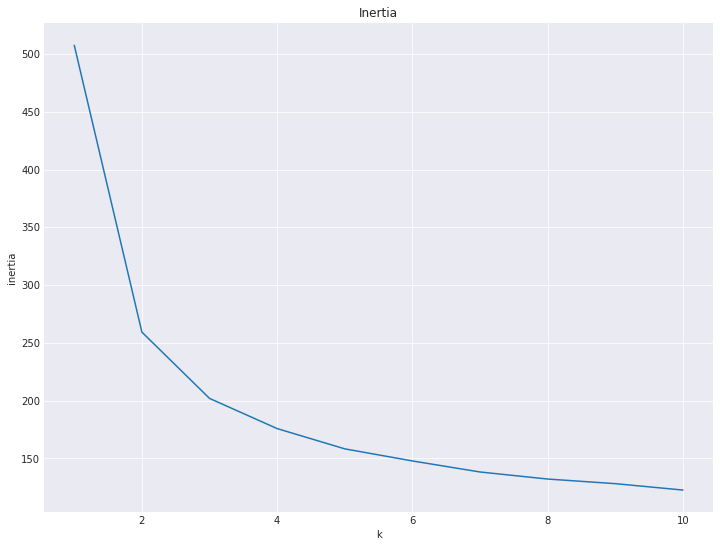

In [17]:
plt.plot(range(1, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Inertia')

2. Постройте график силуета (silhoette_score) (кол-во кластеров от 1 до 10)


In [22]:
silhouette = []
for k_i in range(2, 11):
    kmeans = KMeans(n_clusters=k_i)
    kmeans.fit(nba)
    silhouette.append(silhouette_score(nba, kmeans.labels_)) 

Text(0.5, 1.0, 'Silhouette')

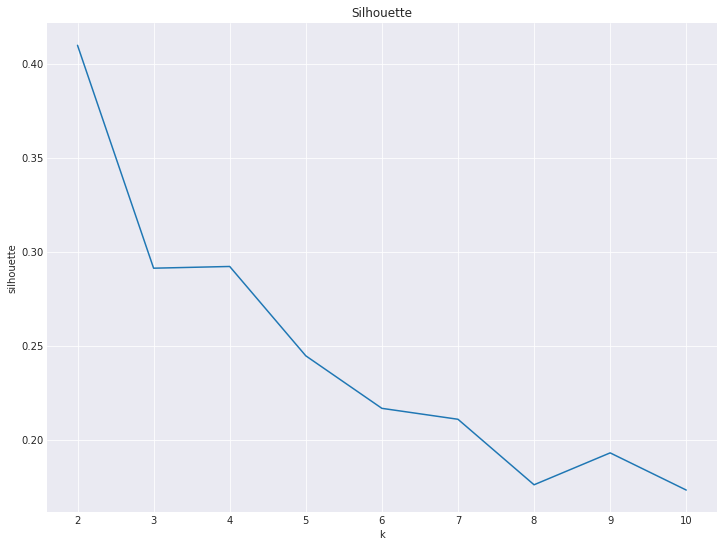

In [23]:
plt.plot(range(2, 11), silhouette);
plt.xlabel('k')
plt.ylabel('silhouette')
plt.title('Silhouette')

3. Постройте график силуета для каждого кластера отдельно, для этого воспользуйтесь функцией clusters_stats

Пример вызова clusters_stats:

In [26]:
def clusters_stats(n_clusters, clusters, X):
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    silhouette_avg = silhouette_score(X, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, clusters)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[clusters == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()


For n_clusters = 2 The average silhouette_score is : 0.40983850855986453


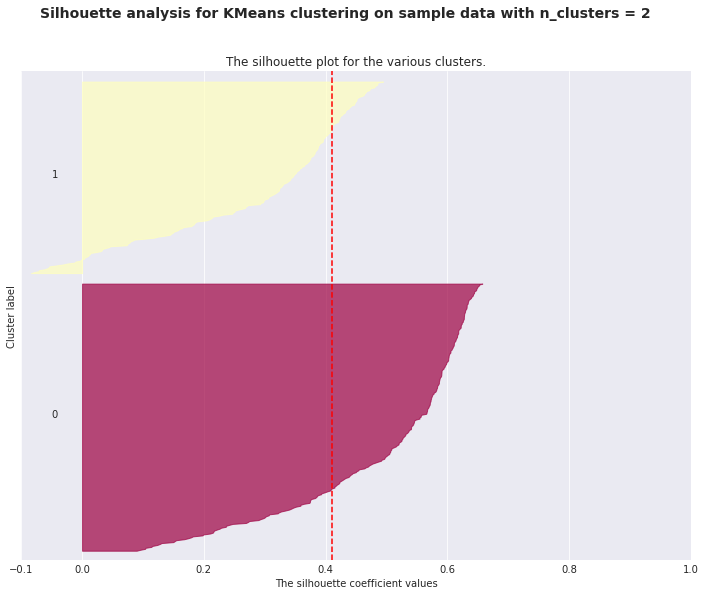

For n_clusters = 3 The average silhouette_score is : 0.2924517641893121


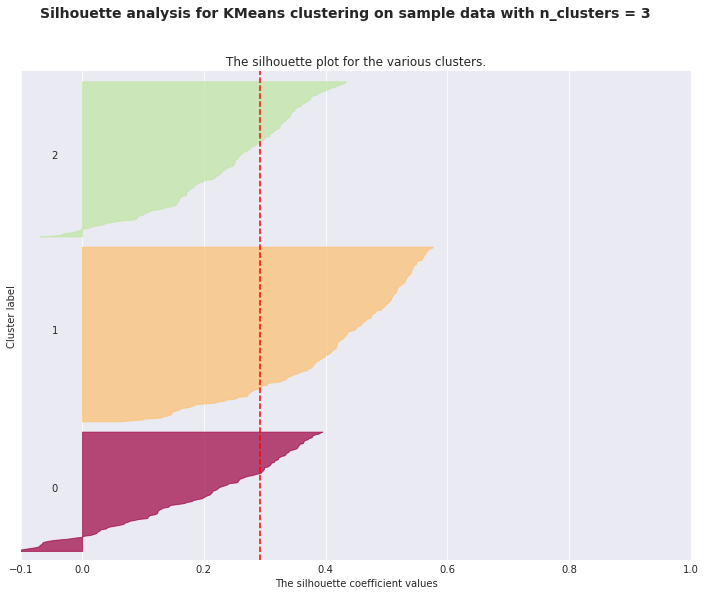

For n_clusters = 4 The average silhouette_score is : 0.2921706696409926


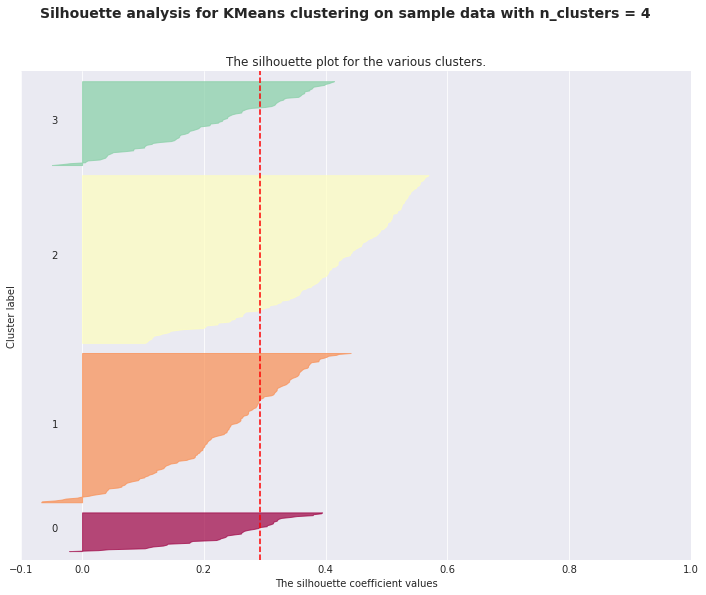

For n_clusters = 5 The average silhouette_score is : 0.24882999972421815


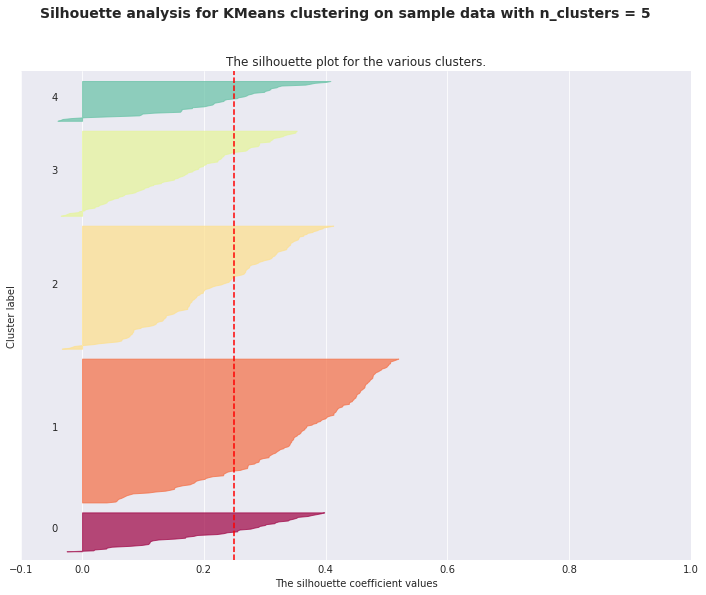

For n_clusters = 6 The average silhouette_score is : 0.2077236309953232


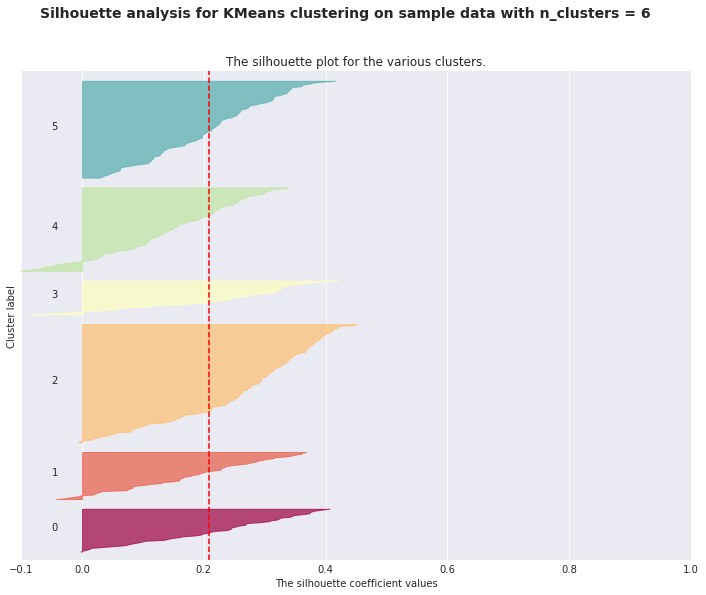

For n_clusters = 7 The average silhouette_score is : 0.20835276364609703


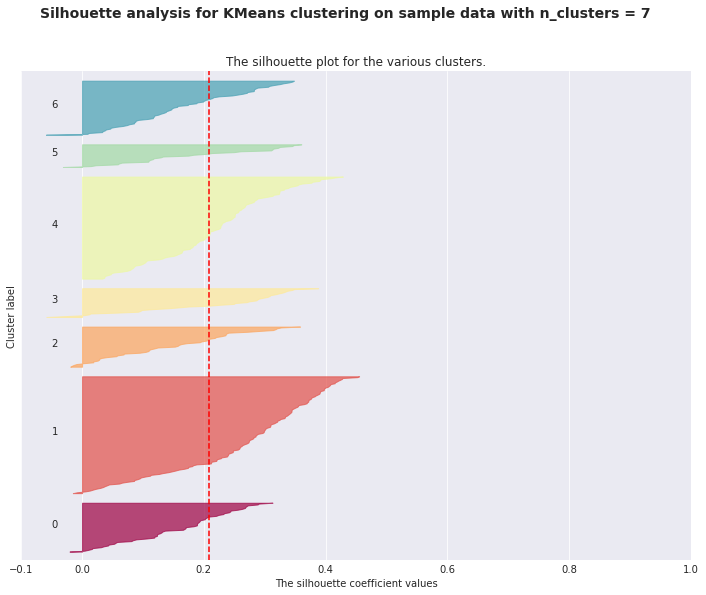

For n_clusters = 8 The average silhouette_score is : 0.20389890328522142


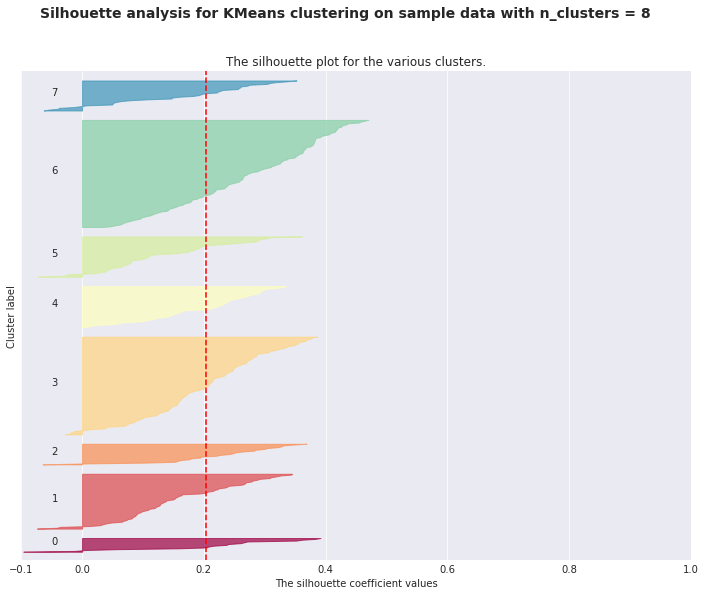

For n_clusters = 9 The average silhouette_score is : 0.1683994289259129


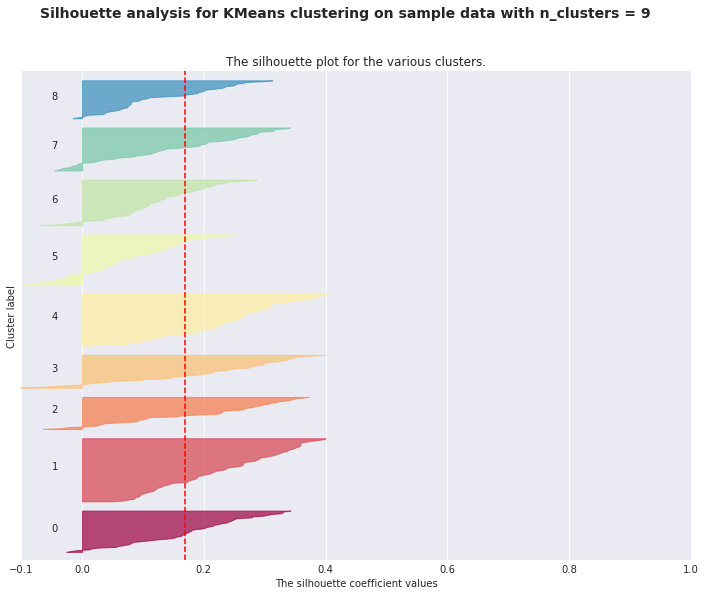

For n_clusters = 10 The average silhouette_score is : 0.18118847238996005


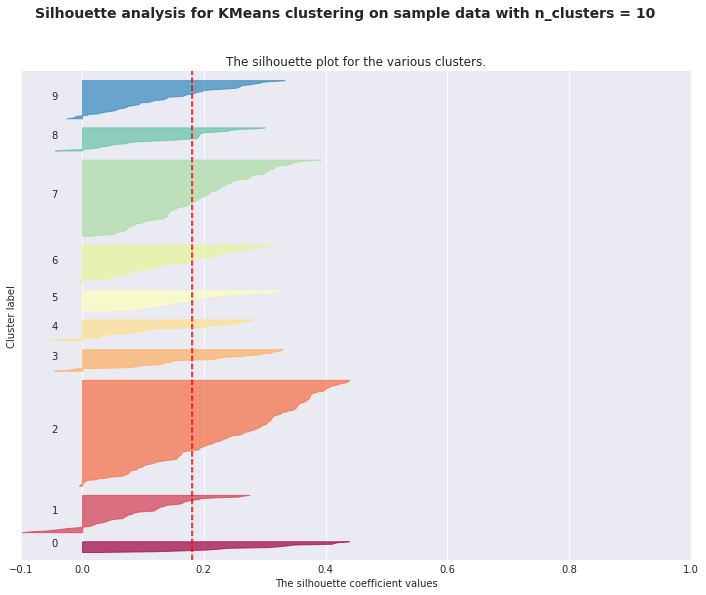

In [29]:
for i in range(2,11):
  n_clusters = i
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(nba)
  clusters = kmeans.predict(nba)
  clusters_stats(n_clusters, clusters,nba )

Проанализируйте полученный результат и определите оптимальное число кластеров. Чему оно равно?

**Оптимальное количество кластеров - от 2 до 3.**


4. Уменьшите количество признаков в исходном датасете nba до 2 с помощью TSNE c параметром perplexity=30. Результат запишите в таблицу tsne_representation.

In [31]:
tsne_representation = pd.DataFrame(TSNE(perplexity=30).fit_transform(nba))

In [32]:
display(tsne_representation)

,0,1
0,2.582225,4.328817
1,-1.095292,6.658006
2,4.307827,6.025439
3,-25.076157,8.768683
4,1.802223,9.998156
...,...,...
476,-13.584093,5.849042
477,-13.286548,-3.038388
478,-23.492651,14.365092
479,-1.903073,8.196652


5. Теперь обучите Kmeans еще раз задав оптимальное число кластеров. Визуализируйте полученное разбиение на преобразованном датасете tsne_representation (каждый из 2 "сжатых" признаков в таблице tsne_representation - это ось на графике). Пример визуализации:

In [35]:
km = KMeans(n_clusters=2)
result = km.fit_predict(tsne_representation)

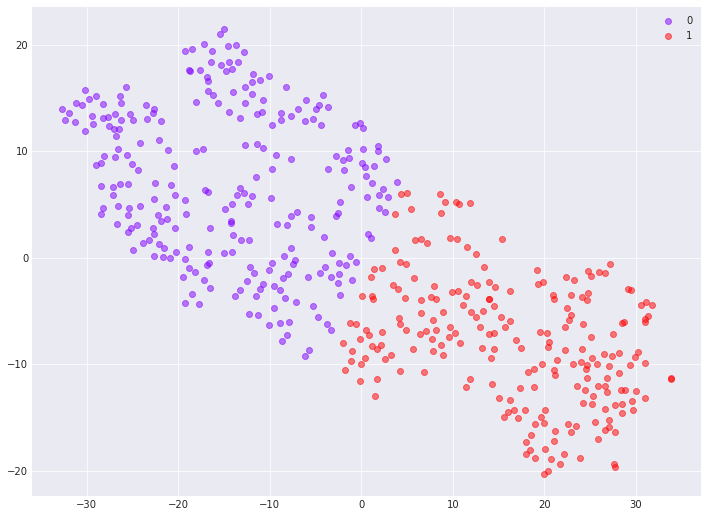

In [36]:
colors = cm.rainbow(np.linspace(0, 1, len(set(km.labels_))))

for y, c in zip(set(km.labels_), colors):
    plt.scatter(pd.DataFrame(tsne_representation)[0].loc[pd.DataFrame(km.labels_).values==y], 
                pd.DataFrame(tsne_representation)[1].loc[pd.DataFrame(km.labels_).values==y], color=c, alpha=0.5, label=str(y))
plt.legend()


### Теперь попробуем метод DBScan

1. Визуализируйте параметр eps в цикле для разных min_samples(от 3 до 10)

Выберите оптимальное значение min_samples и eps. Eps определите по методы локтя. Min_samples выбирайте исходя из 2 критериев: чем меньше оптимальное eps - тем лучше, чем больше точек по оси Х остается (не записывается в выбросы) - тем лучше.

In [ ]:
#Ваш код здесь

Проанализируйте полученный результат и определите оптимальное число кластеров. Чему оно равно?

2. Теперь обучите DBScan еще раз, задав оптимальное число кластеров. Визуализируйте полученное разбиение на преобразованном датасете tsne_representation (каждый из 2 "сжатых" признаков в таблице tsne_representation - это ось на графике). Пример визуализации:

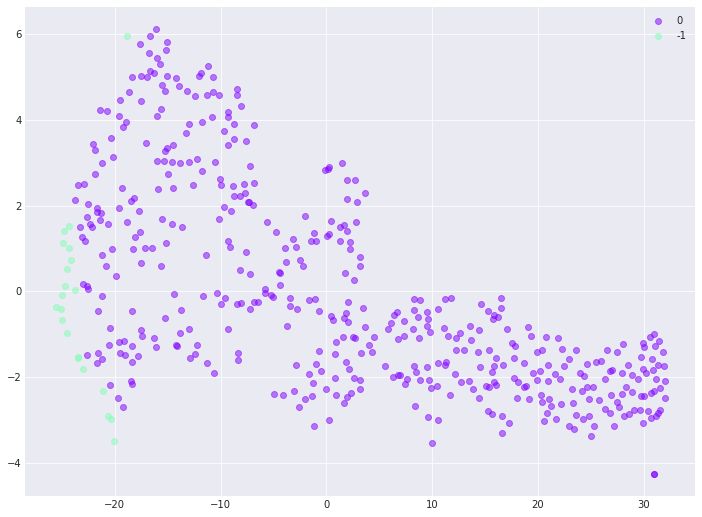

In [57]:

colors = cm.rainbow(np.linspace(0, 1, len(set(km.labels_))))

for y, c in zip(set(db.labels_), colors):
    plt.scatter(pd.DataFrame(tsne_representation)[0].loc[pd.DataFrame(db.labels_).values==y], 
                pd.DataFrame(tsne_representation)[1].loc[pd.DataFrame(db.labels_).values==y], color=c, alpha=0.5, label=str(y))
plt.legend()


In [ ]:
#Ваш код здесь

Выделите топ-3 самых значимых признака игроков NBA на ваш взгляд. Можете придумать для этого свое математическое правило, например выделить топ признаков по разнице между минимальным и максимальным значениями.
Попарно визуализируйте на графике эти признаки и метки классов (выберите labels_ наилучшего на ваш взгляд разбиения) - в примере выше вместо tsne_representation подставьте 
nba[['имя первого признака','имя второго признака']]

In [ ]:
#Ваш код здесь

Какая зависимоть наблюдется между классами и признаками игроков?